(CONFIDENTIAL) INTERNAL USE ONLY, NOT FOR EXTERNAL DISTRIBUTION

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Bias and Varience

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# the physical law says: S = 1/2 * F / M * t*2
# S: displacement, M: mass, F: force
# Let's say we know nothing about physics
# Given this data measure points: 
# (t, S) for N points, we want to predict for (t_new) what is S_new

In [3]:
ground_truth_coef = 1./2 * 10 / 2
t = np.random.random(10) * 3
ground_truth_result = ground_truth_coef * t**2

# measure error
measure_result = ground_truth_result + np.random.randn(10)*2

t_new = np.random.random(5) * 3
# s_new

In [4]:
from sklearn import linear_model, metrics
lm_lr = linear_model.LinearRegression()

/Users/peter/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/peter/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/peter/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/peter/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [5]:
# Under fitting, what is the error? (using 1 order)
# we need to run it over multple times to see the difference
N = 10000
error = []
error_train = []
for i in range(N):
    t = np.random.random(10) * 3
    ground_truth_result = ground_truth_coef * t**2
    measure_result = ground_truth_result + np.random.randn(10)*2
    t.resize([len(t), 1])
    
    lm_lr.fit(t, measure_result)
    
    t_new = (np.random.random(5) * 3).reshape(-1, 1)
    t_truth = ground_truth_coef * t_new[:,0]**2
    t_pred = lm_lr.predict(t_new)
    
    error.append(metrics.mean_squared_error(t_pred, t_truth))
    #error_train.append(metrics.mean_squared_error(t, measure_result))

error = np.array(error)
#error_train = np.array(error_train)

In [7]:
#print error_train.mean(), error_train.std()
print (error.mean(), np.sqrt(error.std()))

4.92211745054929 2.2446484492419017


In [8]:
# Over fitting, what is the error? (using 3 order)
N = 10000
error = []
for i in range(N):
    t = (np.random.random(10) * 3).reshape([-1, 1])
    ground_truth_result = ground_truth_coef * t**2
    measure_result = ground_truth_result + (np.random.randn(10)*2).reshape([-1,1])
    t = np.hstack([t, t**2, t**3])
    
    lm_lr.fit(t, measure_result)
    
    t_new = (np.random.random(5)).reshape([-1, 1])
    t_new = np.hstack([t_new, t_new**2, t_new**3])
    t_truth = ground_truth_coef * t_new[:,0]**2
    t_pred = lm_lr.predict(t_new)
    
    error.append(metrics.mean_squared_error(t_pred, t_truth))
    #error_train.append(metrics.mean_squared_error(t[:,0], measure_result))

    
error = np.array(error)
#error_train = np.array(error_train)

In [9]:
print (error.mean(), np.sqrt(error.std()))

21.51561957913036 17.699143886196346


In [10]:
# good fitting, what is the error? (using 2 order)
N = 10000
error = []
for i in range(N):
    t = (np.random.random(10) * 3).reshape([-1, 1])
    ground_truth_result = ground_truth_coef * t**2
    measure_result = ground_truth_result + (np.random.randn(10)*2).reshape([-1,1])
    t = np.hstack([t, t**2])
    
    lm_lr.fit(t, measure_result)
    
    t_new = (np.random.random(5)).reshape([-1, 1])
    t_new = np.hstack([t_new, t_new**2])
    t_truth = ground_truth_coef * t_new[:,0]**2
    t_pred = lm_lr.predict(t_new)
    
    error.append(metrics.mean_squared_error(t_pred, t_truth))
    
error = np.array(error)

In [11]:
print (error.mean(), np.sqrt(error.std()))

3.0323428915326316 3.4584635858543726


In [ ]:
# Balance Varience & Bias
np.random.seed(1)
x = (np.random.random([30, 1]) * 6 - 4).ravel()
y = -2*(5*x)**3 - 30 * (5*x) **2 + 100*(10*x) + 500 * np.random.randn(len(x))
plt.scatter(x,y)
plt.show()

In [ ]:
# Q1. Under ALL circumstances, is it that the more complicated a model is, the lower training error? (Y/N)
# Q2. Under ALL circumstances, is it that the more complicated a model is, the lower testing error? (Y/N)
# Q3. How does standard deviation looks like for both training & testing errors (uncertain, high, LOW)

# Y, N, Y/N

## Bias & varience: model complexity

In [ ]:
# single variable linear model (low varience)

# nearest-neighbour model (high varience) 

In [ ]:
# Q. is single linear regression model high bias, low varience? 

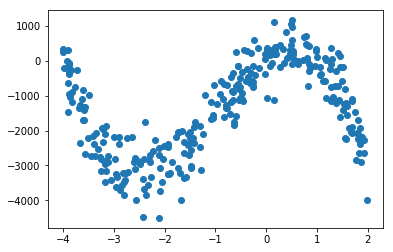

In [17]:
# Data set 1. 
N = 300
np.random.seed(1)
x = (np.random.random([N, 1]) * 6 - 4).ravel()
y = -2*(5*x)**3 - 30 * (5*x) **2 + 100*(10*x) + 500 * np.random.randn(len(x))
plt.scatter(x,y)
plt.show()

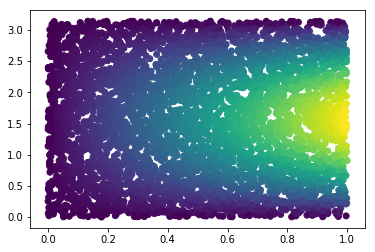

In [18]:
# Data set 2. 
N = 5000
r = np.random.rand(N)
theta = np.random.rand(N) * 1.0 * np.pi
y = np.sin(theta) * r
plt.scatter(r, theta, c=y)

## Bias & varience: data size

In [12]:
from sklearn import datasets, cross_validation
data = datasets.make_regression(n_samples=1000, n_features=100, n_informative=100, noise=100)
X = data[0]
Y = data[1]
print (X.shape, Y.shape)

(1000, 100) (1000,)


/Users/peter/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/peter/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
ts_range = np.arange(0.05, 1, 0.05)
N_run = 50
t_score = []
v_score = []
for train_s in ts_range:
    t_score.append([])
    v_score.append([])
    for iseed in range(N_run):
        X1, X2, Y1, Y2 = cross_validation.train_test_split(X, Y, train_size=train_s, random_state=iseed)
        rlm = linear_model.LinearRegression()
        rlm.fit(X1, Y1)
        t_score[-1].append(metrics.r2_score(Y1, rlm.predict(X1)))
        v_score[-1].append(metrics.r2_score(Y2, rlm.predict(X2)))
    # print train_s

In [14]:
t_score = np.array(t_score)
v_score = np.array(v_score)

/Users/peter/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


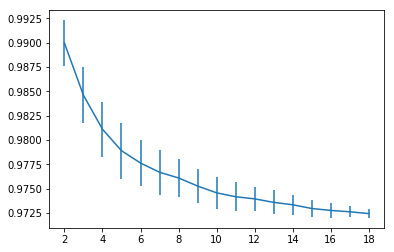

In [15]:
# errorbar plot (training and validation)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x = range(t_score.shape[0])[2:]
y = t_score.mean(axis=1)[2:]
s = t_score.std(axis=1)[2:]
ax.errorbar(x, y, yerr=s)
fig.show()

/Users/peter/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


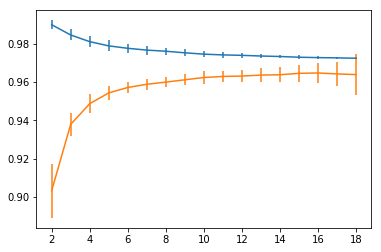

In [16]:
# errorbar plot (training and validation)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x = range(t_score.shape[0])[2:]
y = t_score.mean(axis=1)[2:]
s = t_score.std(axis=1)[2:]
ax.errorbar(x, y, yerr=s)
x = range(v_score.shape[0])[2:]
y = v_score.mean(axis=1)[2:]
s = v_score.std(axis=1)[2:]
ax.errorbar(x, y, yerr=s)
fig.show()

# Regression in-depth

In [ ]:
# Regular linear regression

# Lasso

# Ridge

# Elastic-net

## Regularization

/Users/peter/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


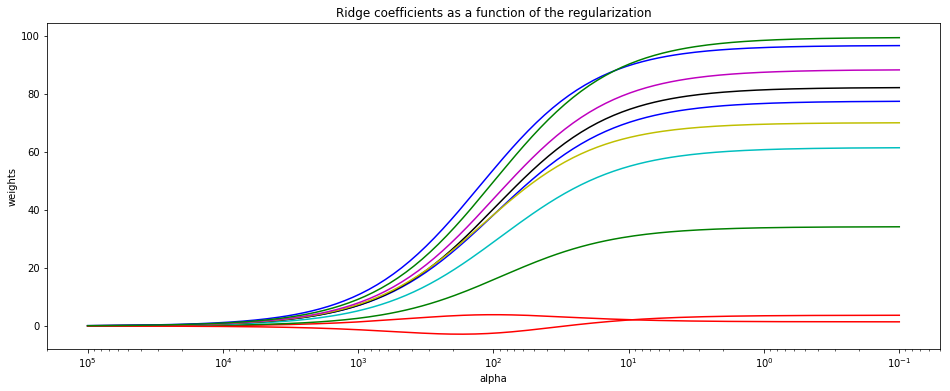

In [19]:
from sklearn import datasets
# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)
data = datasets.make_regression(n_samples=100, n_features=10, n_informative=10, random_state=0)

X = data[0]
y = data[1]

###############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-1, 5, n_alphas)
clf = linear_model.Ridge()

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

###############################################################################
# Display results
plt.figure(figsize=[16, 6])

ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

/Users/peter/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


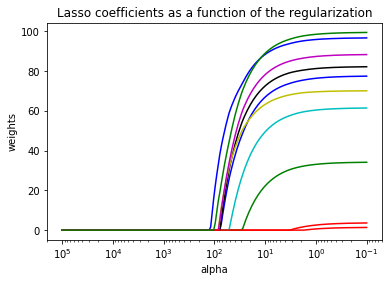

In [20]:
###############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-1, 5, n_alphas)
clf = linear_model.Lasso()

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

###############################################################################
# Display results

ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

/Users/peter/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


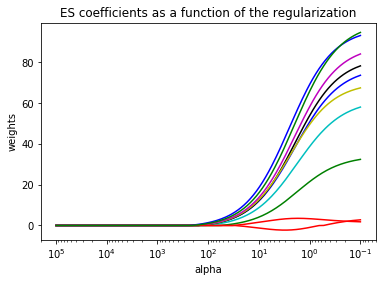

In [21]:
###############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-1, 5, n_alphas)
clf = linear_model.ElasticNet(l1_ratio=0.5)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

###############################################################################
# Display results

ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('ES coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [ ]:
# Excercise, run the regression over friedman datasets, see which variables are selected at different alpha
data = datasets.make_friedman1(random_state=0)
X = data[0]
y = data[1]

## Stochastic gradient descent (SGD)

In [ ]:
# http://vis.supstat.com/2013/03/gradient-descent-algorithm-with-r/
# 

In [44]:
data = datasets.make_regression(n_samples=1000, n_features=100, n_informative=100)
X = data[0]
y = data[1]

In [45]:
# compare efficiency and accuracy for SGD and tradition LR

In [46]:
%%time
lrg1 = linear_model.LinearRegression()
lrg1.fit(X, y)

CPU times: user 16.6 ms, sys: 1.89 ms, total: 18.5 ms
Wall time: 5.73 ms


In [47]:
%%time
lrg2 = linear_model.SGDRegressor()
lrg2.fit(X,y)

CPU times: user 3.44 ms, sys: 1.7 ms, total: 5.14 ms
Wall time: 3.16 ms


/Users/peter/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


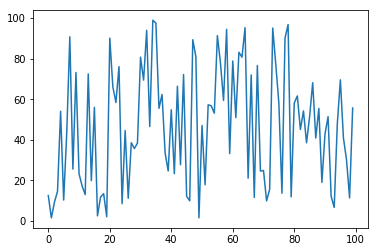

In [48]:
%matplotlib inline
plt.plot(lrg1.coef_)

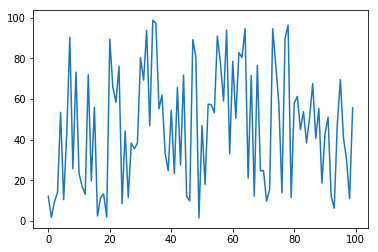

In [49]:
plt.plot(lrg2.coef_)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,
         5.,  5.,  8., 13., 22., 22.,  6.,  1.,  1.,  1.,  2.,  0.,  1.,
         1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.18835461, -0.18559869, -0.18284276, -0.18008683, -0.1773309 ,
        -0.17457497, -0.17181904, -0.16906311, -0.16630719, -0.16355126,
        -0.16079533, -0.1580394 , -0.15528347, -0.15252754, -0.14977161,
        -0.14701569, -0.14425976, -0.14150383, -0.1387479 , -0.13599197,
        -0.13323604, -0.13048011, -0.12772418, -0.12496826, -0.12221233,
        -0.1194564 , -0.11670047, -0.11394454, -0.11118861, -0.108432

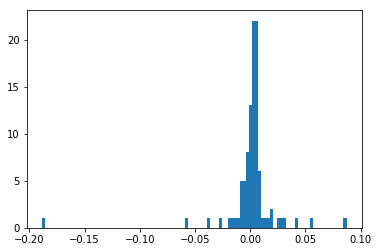

In [50]:
a = (lrg1.coef_ - lrg2.coef_) / lrg1.coef_

plt.hist(a[(a>-10) & (a<10)], bins=100)

## Preprocessing

In [51]:
from sklearn import datasets, preprocessing

In [52]:
X, Y = datasets.make_regression(n_samples=1000, n_features=2, n_informative=2)

In [53]:
X1 = X
X2 = X.copy()
X2[:,1] *= 1000

In [54]:
from sklearn import linear_model

In [55]:
m1 = linear_model.LinearRegression()
m1.fit(X1, Y)

m2 = linear_model.LinearRegression()
m2.fit(X2, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
m1.coef_

array([43.00158688, 64.33052297])

In [57]:
m2.coef_

array([43.00158688,  0.06433052])

In [58]:
m1 = linear_model.SGDRegressor()
m1.fit(X1, Y)

m2 = linear_model.SGDRegressor()
m2.fit(X2, Y)

/Users/peter/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [59]:
m1.coef_, m1.intercept_

(array([42.98969208, 64.3125356 ]), array([-0.0036499]))

In [61]:
m2.coef_, m2.intercept_

(array([-9.69685943e+09,  3.67639524e+12]), array([-6.9072966e+10]))

In [60]:
from sklearn import metrics

In [ ]:
metrics.mean_squared_error(m1.predict(X1), Y)

In [ ]:
m2.coef_, m2.intercept_

In [ ]:
metrics.mean_squared_error(m2.predict(X2), Y)

## Robustness regression

In [ ]:
# Why robustness is needed?

x = np.random.random(100) * 10 
y = 2.0 * x + 30 + 2.0 * np.random.rand(len(x))

xn = np.random.random(10) * 3
yn = 6.0 * xn + 4 + 2.0 * np.random.rand(len(xn))

xnew = np.concatenate([x,xn])
ynew = np.concatenate([y,yn])

xnew = xnew.reshape([-1,1])

In [ ]:
plt.scatter(xnew, ynew)

In [ ]:
lm_lr = linear_model.LinearRegression()

In [ ]:
lm_lr.fit(xnew, ynew)
y_pred = lm_lr.predict(xnew)
plt.scatter(xnew, ynew)
plt.scatter(xnew, y_pred)

In [ ]:
# linear_model.RANSACRegressor?
lm_lr = linear_model.RANSACRegressor()

In [ ]:
lm_lr.fit(xnew, ynew)
y_pred = lm_lr.predict(xnew)
plt.scatter(xnew, ynew)
plt.scatter(xnew, y_pred)

In [ ]:
# RANSAC
# https://upload.wikimedia.org/wikipedia/commons/c/c0/RANSAC_LINIE_Animiert.gif